In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.svm import SVC
import sklearn
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(42)

import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

In [14]:
from keras.models import Sequential, model_from_json  # Model type to be used
from keras.optimizers import Adam

from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import to_categorical                       # NumPy related tools
from pathlib import Path

In [15]:
def load_image_files(container_path, dimension=(128,128)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "Your own dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            if file.suffix.lower() not in ['.jpg', '.jpeg', '.png','.webp','.gif']:
                print(f"Skipped non-image file: {file}")
                continue
            img = cv2.imread(str(file), cv2.IMREAD_COLOR)
            if img is None:
                print(f"Failed to read image: {file}")
                continue
            img_resized = cv2.resize(img, dimension, interpolation=cv2.INTER_AREA)
            
            if img_resized.size == 0:
                print(f"Empty image: {file}")
                continue
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)


    return Bunch(
        data=flat_data,
        target=target,
        target_names=categories,
        images=images,
        DESCR=descr
    )

In [16]:
image_dataset = load_image_files("./Soil_Data_V3/Trains")
image_dataset_test = load_image_files("./Soil_Data_V3/Tests")

Skipped non-image file: Soil_Data_V3\Trains\Mary\desktop.ini
Skipped non-image file: Soil_Data_V3\Trains\Sand\desktop.ini
Skipped non-image file: Soil_Data_V3\Trains\Silt\desktop.ini
Skipped non-image file: Soil_Data_V3\Tests\Alluvial soil\.ipynb_checkpoints
Skipped non-image file: Soil_Data_V3\Tests\Chalky\desktop.ini


In [18]:
X_train = image_dataset.images.reshape(-1,128*128*3)
X_test = image_dataset_test.images.reshape(-1,128*128*3)
y_train = image_dataset.target
y_test=image_dataset_test.target

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess test dataset

test_features = X_test


# Load and preprocess train dataset

train_features = X_train


# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

# Perform PCA
pca = PCA(n_components = 200)
X_train = pca.fit_transform(scaled_train_features, y_train)
X_test = pca.transform(scaled_test_features)

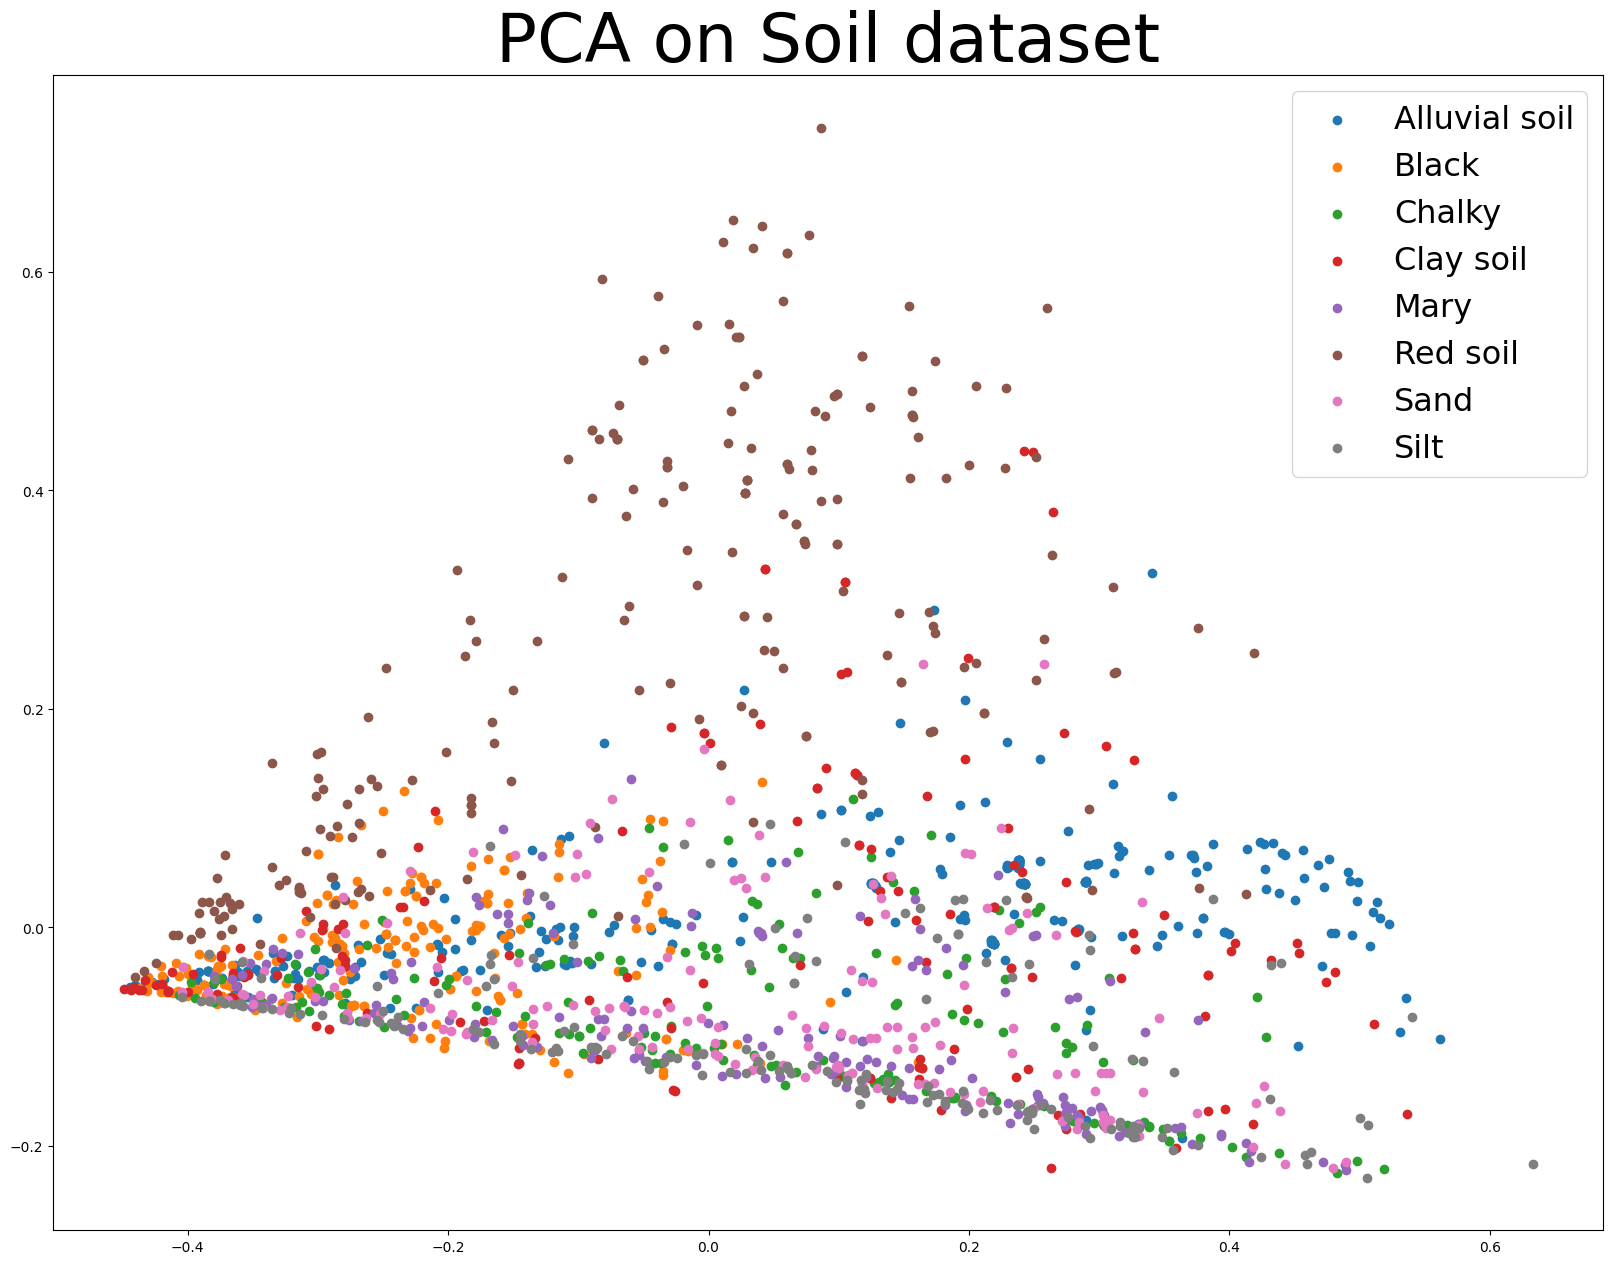

In [23]:
plt.figure(figsize=(20,15))
for  i, target_name in zip([ 0, 1, 2, 3, 4, 5, 6, 7], image_dataset.target_names):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test== i, 1], label=target_name)
plt.legend(fontsize=23)
plt.title('PCA on Soil dataset', fontsize =49)

plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
import time

# Start timing
start_time = time.time()
clf_rf = RandomForestClassifier(class_weight='balanced',max_depth= 9, min_samples_leaf= 3, min_samples_split= 2, random_state=42)

clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
f1_rf = metrics.f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = metrics.precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = metrics.recall_score(y_test, y_pred_rf, average='weighted')
print(metrics.classification_report(y_test, y_pred_rf, target_names=image_dataset.target_names))
print("Accuracy", round(accuracy_rf*100,2))

print("F1-score ",round(f1_rf*100,2))
print("Precision ",round(precision_rf*100,2))
print("Recall",round(recall_rf*100,2))

accuracy.append(round(accuracy_rf*100,2))
f1_score.append(round(f1_rf*100,2))


end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed Time:", round(elapsed_time, 2), "seconds")

               precision    recall  f1-score   support

Alluvial soil       0.89      0.82      0.85       316
        Black       0.51      0.98      0.67       210
       Chalky       0.64      0.66      0.65       166
    Clay soil       0.82      0.57      0.68       160
         Mary       0.83      0.72      0.77       172
     Red soil       0.88      0.87      0.88       222
         Sand       0.84      0.58      0.69       170
         Silt       0.78      0.59      0.67       168

     accuracy                           0.74      1584
    macro avg       0.78      0.72      0.73      1584
 weighted avg       0.78      0.74      0.75      1584

Accuracy 74.49
F1-score  74.76
Precision  78.35
Recall 74.49


NameError: name 'accuracy' is not defined

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

start_time = time.time()
clf_dt = DecisionTreeClassifier(class_weight='balanced',max_depth =9, min_samples_leaf=1, min_samples_split= 2, random_state=42)

clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
f1_dt = metrics.f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = metrics.precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = metrics.recall_score(y_test, y_pred_dt, average='weighted')
print(metrics.classification_report(y_test, y_pred_dt, target_names=image_dataset.target_names))
print("Accuracy", round(accuracy_dt*100,2))

print("F1-score ",round(f1_dt*100,2))
print("Precision ",round(precision_dt*100,2))
print("Recall",round(recall_dt*100,2))

accuracy.append(round(accuracy_dt*100,2))
f1_score.append(round(f1_dt*100,2))

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed Time:", round(elapsed_time, 2), "seconds")

               precision    recall  f1-score   support

Alluvial soil       0.84      0.72      0.77       316
        Black       0.60      0.61      0.60       210
       Chalky       0.35      0.43      0.39       166
    Clay soil       0.61      0.54      0.57       160
         Mary       0.69      0.37      0.48       172
     Red soil       0.91      0.85      0.88       222
         Sand       0.39      0.31      0.34       170
         Silt       0.33      0.64      0.44       168

     accuracy                           0.58      1584
    macro avg       0.59      0.56      0.56      1584
 weighted avg       0.62      0.58      0.59      1584

Accuracy 58.33
F1-score  59.11
Precision  62.44
Recall 58.33


NameError: name 'accuracy' is not defined

In [26]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(X_train,y_train)

kn_pred = kn.predict(X_test)
print("----------------------------------")
print(metrics.classification_report(y_pred=kn_pred,y_true=y_test, target_names=image_dataset.target_names))
print("----------------------------------")
print("Accuracy = ", round(metrics.accuracy_score(kn_pred, y_test) *100,2))
print("----------------------------------")
print("F1-score = ", round(metrics.f1_score(kn_pred,y_test, average='weighted') * 100,2))

accuracy.append(round(metrics.accuracy_score(kn_pred, y_test) *100,2))
f1_score.append( round(metrics.f1_score(kn_pred,y_test, average='weighted') * 100,2))
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed Time:", round(elapsed_time, 2), "seconds")

----------------------------------
               precision    recall  f1-score   support

Alluvial soil       0.55      0.88      0.68       316
        Black       0.62      0.92      0.74       210
       Chalky       0.55      0.52      0.53       166
    Clay soil       0.85      0.35      0.50       160
         Mary       0.86      0.59      0.70       172
     Red soil       0.93      0.90      0.91       222
         Sand       0.81      0.41      0.55       170
         Silt       0.74      0.54      0.63       168

     accuracy                           0.68      1584
    macro avg       0.74      0.64      0.65      1584
 weighted avg       0.72      0.68      0.67      1584

----------------------------------
Accuracy =  67.93
----------------------------------
F1-score =  69.05


NameError: name 'accuracy' is not defined

In [27]:
svm = SVC(class_weight='balanced', C=10,gamma='scale', kernel='linear', random_state=42) 
start_time = time.time()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(metrics.classification_report(y_test, y_pred, target_names=image_dataset.target_names))
accuracy_svm = metrics.accuracy_score(y_test, y_pred)
f1_svm = metrics.f1_score(y_test, y_pred, average='weighted')
precision_svm = metrics.precision_score(y_test, y_pred, average='weighted')
recall_svm = metrics.recall_score(y_test, y_pred, average='weighted')
print("Accuracy", accuracy_svm)
accuracy.append(accuracy_svm*100)
f1_score.append(f1_svm*100)
precision_score.append(precision_svm*100)
recall_score.append(recall_svm*100)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed Time:", round(elapsed_time, 2), "seconds")

accuracy.append(round(metrics.accuracy_score(y_test, y_pred) *100,2))
f1_score.append( round(metrics.f1_score(y_test, y_pred, average='weighted') * 100,2))

               precision    recall  f1-score   support

Alluvial soil       0.87      0.86      0.86       316
        Black       0.63      0.95      0.76       210
       Chalky       0.58      0.72      0.64       166
    Clay soil       0.82      0.60      0.69       160
         Mary       0.92      0.76      0.83       172
     Red soil       0.97      0.94      0.95       222
         Sand       0.88      0.61      0.72       170
         Silt       0.71      0.65      0.68       168

     accuracy                           0.78      1584
    macro avg       0.80      0.76      0.77      1584
 weighted avg       0.81      0.78      0.78      1584

Accuracy 0.7828282828282829


NameError: name 'accuracy' is not defined

[Text(0, 0.5, 'Alluvial soil'),
 Text(0, 1.5, 'Black'),
 Text(0, 2.5, 'Chalky'),
 Text(0, 3.5, 'Clay soil'),
 Text(0, 4.5, 'Mary'),
 Text(0, 5.5, 'Red soil'),
 Text(0, 6.5, 'Sand'),
 Text(0, 7.5, 'Silt')]

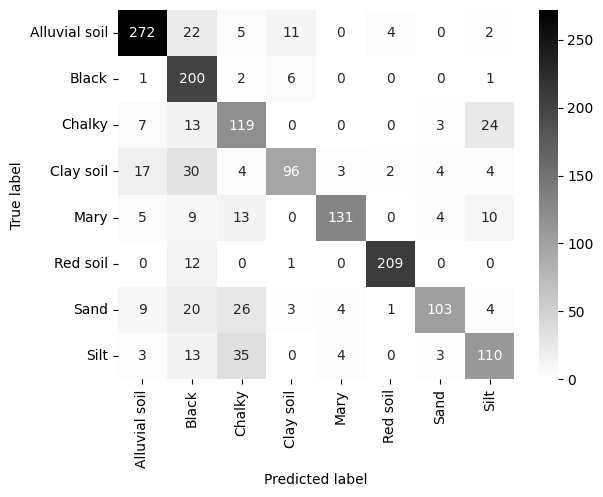

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt    


from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='binary')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(image_dataset.target_names, rotation='vertical')
ax.yaxis.set_ticklabels(image_dataset.target_names, rotation='horizontal')

In [29]:
X_train= image_dataset.images
X_test= image_dataset_test.images
y_train= image_dataset.target
y_test=image_dataset_test.target

print(X_train.shape)
print(X_test.shape) 

(3670, 128, 128, 3)
(1584, 128, 128, 3)


In [30]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('./input/trained-cnn/optimal_cnn.h5')

C:\Users\adi1s\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\adi1s\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [31]:
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=10,
                                        restore_best_weights=True)

In [32]:
history=loaded_model.fit(X_train,y_train,batch_size=8,epochs=30, validation_data=(X_test,y_test),verbose=1,callbacks=[earlystopping])

Epoch 1/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 153s 320ms/step - accuracy: 0.4908 - loss: 3.5410 - val_accuracy: 0.7216 - val_loss: 0.8892
Epoch 2/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 156s 340ms/step - accuracy: 0.7648 - loss: 0.8055 - val_accuracy: 0.8011 - val_loss: 0.6883
Epoch 3/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 217s 474ms/step - accuracy: 0.8558 - loss: 0.4947 - val_accuracy: 0.8447 - val_loss: 0.6081
Epoch 4/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 198s 431ms/step - accuracy: 0.9246 - loss: 0.2904 - val_accuracy: 0.8479 - val_loss: 0.5854
Epoch 5/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 203s 443ms/step - accuracy: 0.9553 - loss: 0.2005 - val_accuracy: 0.8611 - val_loss: 0.5950
Epoch 6/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 203s 443ms/step - accuracy: 0.9747 - loss: 0.1352 - val_accuracy: 0.8681 - val_loss: 0.5989
Epoch 7/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 207s 450ms/step - accuracy: 0.9815 - loss: 0.1095 - val_accuracy: 0.8750 - val_loss: 0.6139
Epoch 8/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 224s 489ms/step - accuracy: 0.9903 -

In [34]:
y_pred = loaded_model.predict(X_test)
# Get the class predictions (indices of the highest probability) from y_pred
y_pred = np.argmax(y_pred, axis=1)

print(metrics.classification_report(y_test, y_pred, target_names=image_dataset.target_names))
accuracy_cnn = metrics.accuracy_score(y_test, y_pred)
f1_cnn = metrics.f1_score(y_test, y_pred, average='weighted')
precision_cnn = metrics.precision_score(y_test, y_pred, average='weighted')
recall_cnn = metrics.recall_score(y_test, y_pred, average='weighted')
print("Accuracy", accuracy_cnn * 100)
print("F1-Score", f1_cnn * 100)
accuracy.append(accuracy_cnn * 100)
f1_score.append(f1_cnn * 100)
precision_score.append(precision_cnn * 100)
recall_score.append(recall_cnn * 100)

50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step
               precision    recall  f1-score   support

Alluvial soil       0.90      0.89      0.90       316
        Black       0.89      0.92      0.90       210
       Chalky       0.69      0.83      0.75       166
    Clay soil       0.83      0.77      0.80       160
         Mary       0.88      0.78      0.83       172
     Red soil       0.92      0.99      0.95       222
         Sand       0.76      0.75      0.76       170
         Silt       0.86      0.74      0.79       168

     accuracy                           0.85      1584
    macro avg       0.84      0.83      0.84      1584
 weighted avg       0.85      0.85      0.85      1584

Accuracy 84.78535353535354
F1-Score 84.74648909434718


NameError: name 'accuracy' is not defined

[Text(0, 0.5, 'Alluvial soil'),
 Text(0, 1.5, 'Black'),
 Text(0, 2.5, 'Chalky'),
 Text(0, 3.5, 'Clay soil'),
 Text(0, 4.5, 'Mary'),
 Text(0, 5.5, 'Red soil'),
 Text(0, 6.5, 'Sand'),
 Text(0, 7.5, 'Silt')]

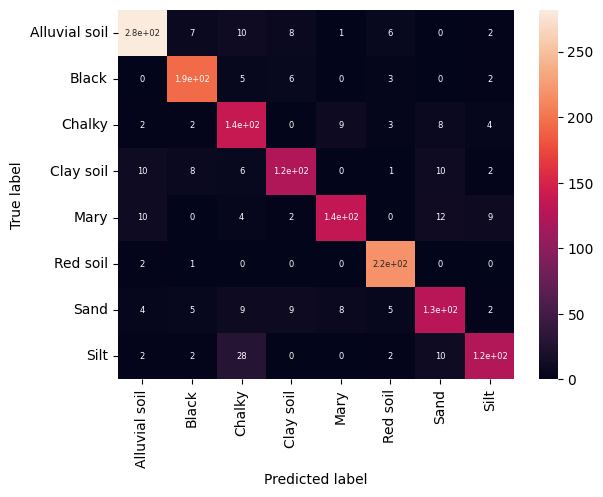

In [52]:
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, annot_kws={"size": 6})
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(image_dataset.target_names, rotation='vertical')
ax.yaxis.set_ticklabels(image_dataset.target_names, rotation='horizontal')

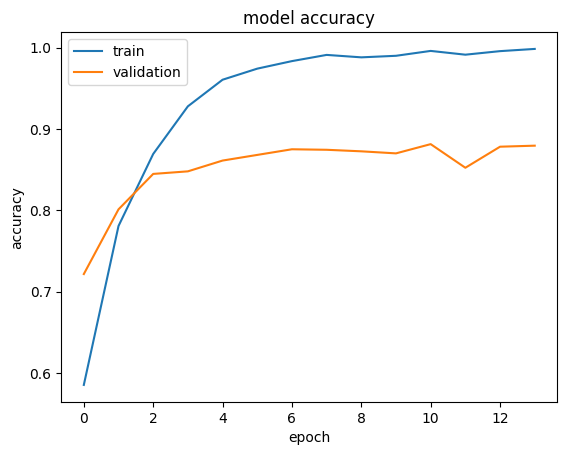

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: name 'accuracy' is not defined

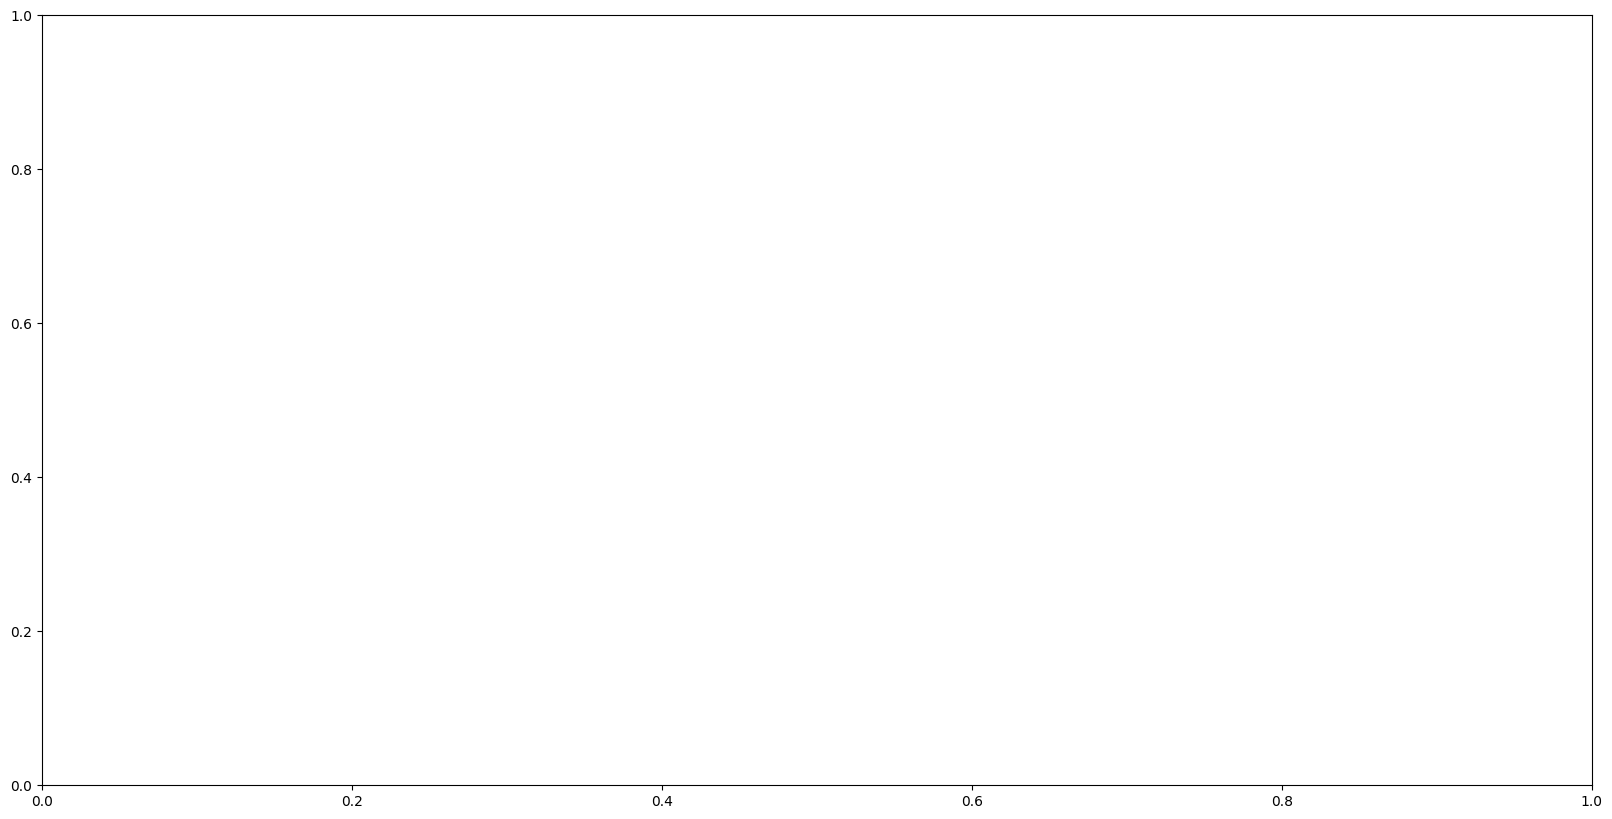

In [37]:
from sklearn.metrics import accuracy_score

key = ['Accuracy', 'F1-Score']
labels = ['Random Forest','Desicion Tree','KNN','SVM','CNN']
bar_width = 0.35
index = range(len(labels))

fig, ax = plt.subplots(figsize=(20, 10))

bar1 = ax.bar(index, accuracy ,bar_width, label='Accuracy', color='red')
bar2 = ax.bar([i + bar_width for i in index], f1_score, bar_width, label='F1-Score', color='green')

# Display percentage values on top of the bars
for bar in [bar1,bar2]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%', 
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=20)

plt.ylabel("Score", fontsize=30)
plt.xlabel("Classification Model", fontsize=30)
plt.legend(key, fontsize=26)
plt.title("Experiment 3: Accuracy and F1 Scores", fontsize=34)
plt.ylim((60,100))
plt.tick_params(labelsize=26)
plt.grid()
plt.xticks([i + bar_width / 2 for i in index], labels)
plt.show()

In [38]:
loaded_model.save('my_model.h5')

In [39]:
loaded_model.save('my_model70.keras')

In [42]:
history.history #Return Dictionary of history


{'accuracy': [0.5852860808372498,
  0.7806539535522461,
  0.8692098259925842,
  0.9277929067611694,
  0.9604904651641846,
  0.9741144180297852,
  0.9833787679672241,
  0.9910081624984741,
  0.9880108833312988,
  0.9899182319641113,
  0.9959127902984619,
  0.9912806749343872,
  0.9956403374671936,
  0.9983651041984558],
 'loss': [1.9843816757202148,
  0.7353423237800598,
  0.4499160945415497,
  0.2786458134651184,
  0.19038458168506622,
  0.13574445247650146,
  0.10609377175569534,
  0.0816197469830513,
  0.08434160053730011,
  0.07693803310394287,
  0.06308457255363464,
  0.07192818820476532,
  0.06193464249372482,
  0.050628457218408585],
 'val_accuracy': [0.7215909361839294,
  0.8011363744735718,
  0.8446969985961914,
  0.8478535413742065,
  0.8611111044883728,
  0.8680555820465088,
  0.875,
  0.8743686676025391,
  0.872474730014801,
  0.8699495196342468,
  0.881313145160675,
  0.8522727489471436,
  0.8781565427780151,
  0.879419207572937],
 'val_loss': [0.8891825079917908,
  0.68830

In [41]:
train_loss, train_acc = loaded_model.evaluate(training_set)
print('Training accuracy:', train_acc)

NameError: name 'training_set' is not defined

In [44]:
import json
with open('training_hist.json','w') as f:
  json.dump(history.history,f)

In [45]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


ValueError: x and y must have same first dimension, but have shapes (6,) and (14,)

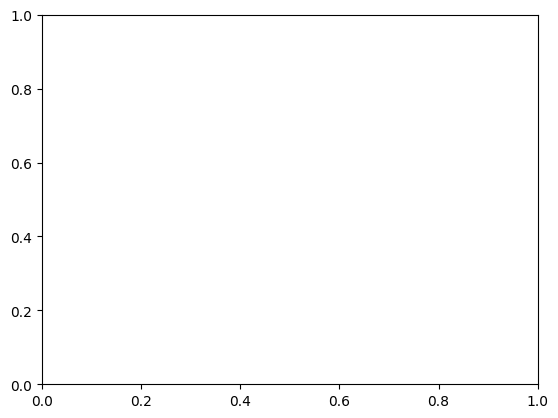

In [49]:
epochs = [i for i in range(1,7)]
plt.plot(epochs,history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()